# Importing Packages

In [25]:
import tensorflow as tf
import pandas as pd
print("TensorFlow version: ",tf.version.VERSION)

TensorFlow version:  2.5.0


# Data analysis

In [6]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 6s 1us/step


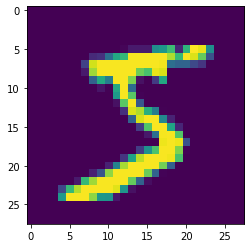

5


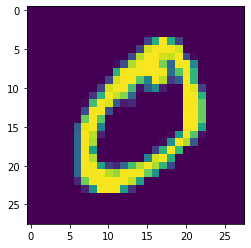

0


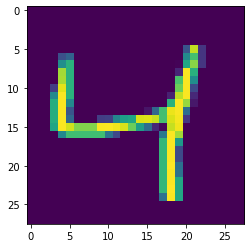

4


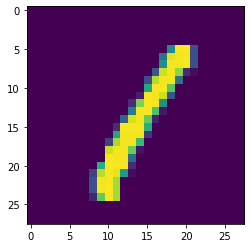

1


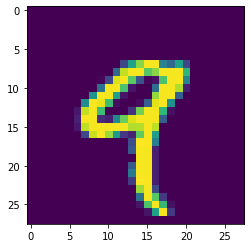

9


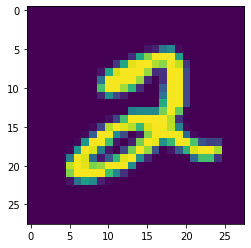

2


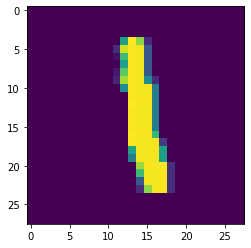

1


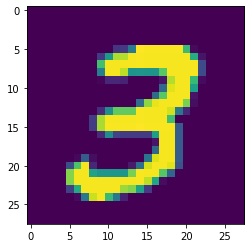

3


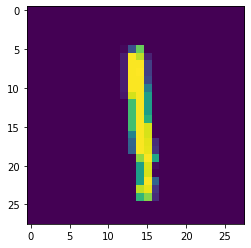

1


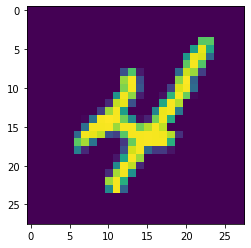

4


In [19]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.imshow(x_train[i])
    plt.show()
    print(y_train[i])

# Model creation

In [20]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10,activation='softmax'),
])

In [21]:

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [22]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

# Model Training

In [24]:
history=model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0397 - accuracy: 0.9871
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0384 - accuracy: 0.9870
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0359 - accuracy: 0.9878
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0351 - accuracy: 0.9882
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0321 - accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0326 - accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0285 - accuracy: 0.9905
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0283 - accuracy: 0.9900
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0292 - accuracy: 0.9903
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.027

<AxesSubplot:>

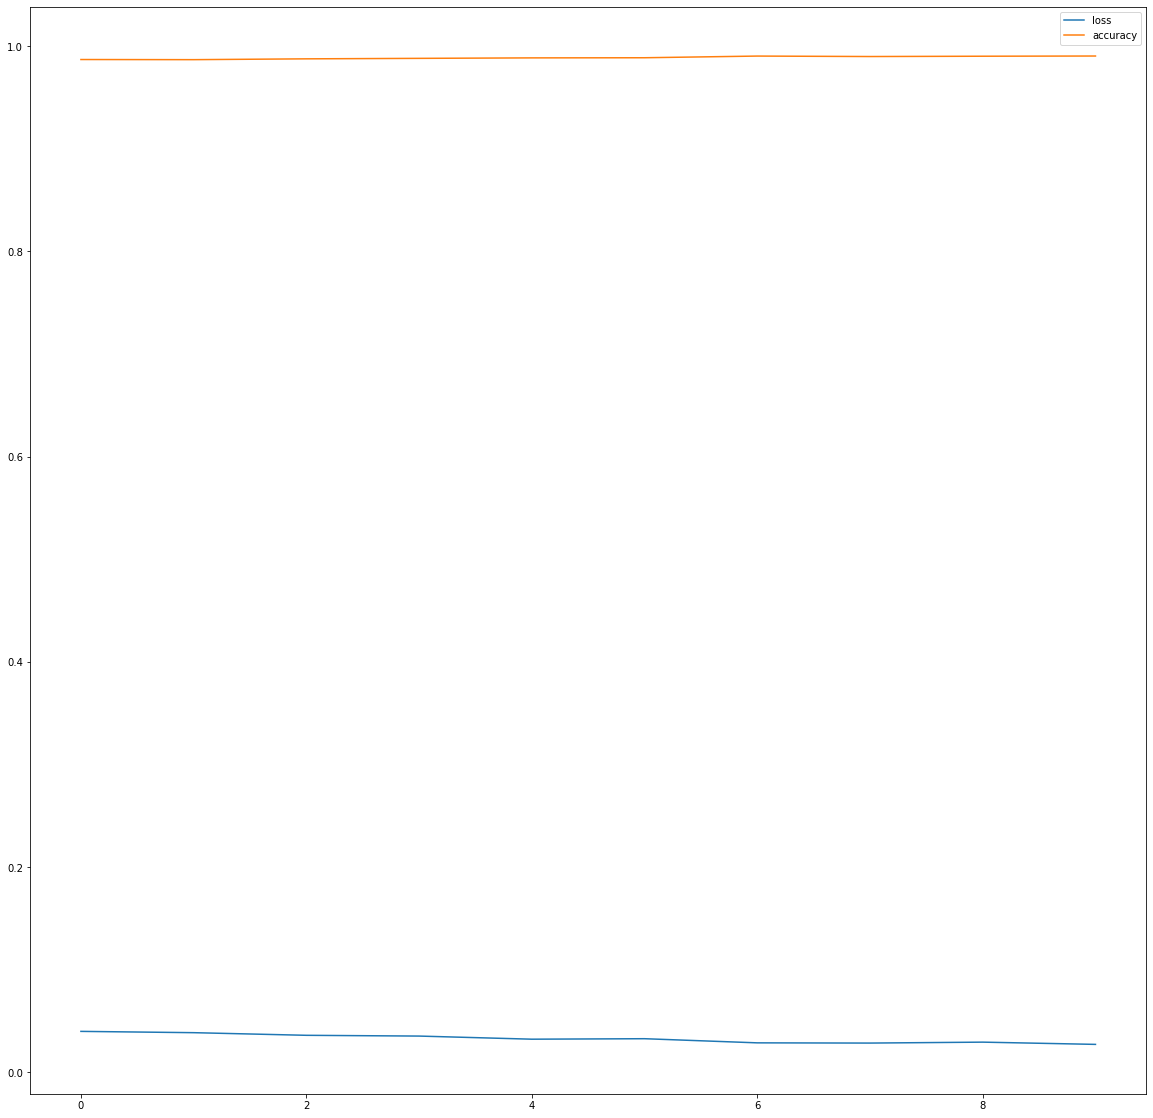

In [34]:
ACCURACY_COLS=['loss','accuracy']
pd.DataFrame(history.history)[ACCURACY_COLS].plot(figsize=[20,20])

# Model Testing

In [35]:
model.evaluate(x_test,  y_test, verbose=2)

/home/lokesh/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


313/313 - 0s - loss: 0.0863 - accuracy: 0.9795


[0.08632127940654755, 0.9794999957084656]

# Model Inference

In [43]:
model.predict(x_test[11].reshape(-1,28,28)).argmax()

6

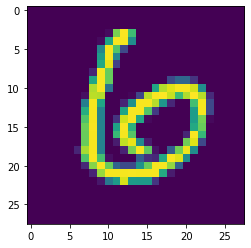

In [44]:
plt.imshow(x_test[11])